# ***Problem Background***

In this capstone project, we will be solving a problem in the mobile phone industry of the US, one of the major smartphones markets in the world.

With a growing trend towards digitisation and prevalence of mobile phones and internet access, more consumers have an online presence and their opinions hold a good value for any product-based company, especially so for the B2C businesses. The industries are trying to fine-tune their strategies to suit the consumer needs, as the consumers leave some hints of their choices during their online presence.

## ***Problem Statement***

customer is a mobile manufacturer based in the US, which entered the market three years ago. As they are a new entrant in the sector, they want to understand their competitors and preferences of their users so that they can design their strategies accordingly. They want to tweak the marketing strategies to add more value to their brand, provide features to customers that add the most value, and close the demand-supply gap. Their objective is to increase the market share as well as the brand value.

They want us to provide them with some major insights into the mobile phone industry to help them achieve their objective. Their objective is to develop a new product optimally and create some marketing strategies.

# ***Solution:***
The solution has been divided into two parts.

**Part 1: Deriving the business insights that are useful for product development and marketing.**

Part 2: Creating a sentiment classification engine.

## ***The following data sets are available ***

meta data of type .json
phone data of type .csv

# The meta data holds information from sellers point of view and the phone data holds user information. We begin by unzipping the meta data file and extracting its content to a list.

# **Part 1: Deriving the business insights that are useful for product development and marketing.**

# Uploading the data from the google drive path

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **importing necessary libraries**

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [3]:
import gzip
import shutil

## ***import files from google drive to google colab***

In [4]:
path1 = '/content/drive/My Drive/sentiment_analysis/meta_Cell_Phones_and_Accessories.json.gz'

In [5]:
path2 = '/content/drive/My Drive/sentiment_analysis/meta_Cell_Phones_and_Accessories.json'

## **Unziping Phone Meta Data**

In [6]:
with gzip.open(path1, 'rb') as f_in:
    with open(path2, 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

In [7]:
import json

# Empty list to store the dictonaries
phonemetadata = []

# Reading the dictionaries in the json file and appending it to the list phonemetadata[]
with open(path2, 'r') as f:
    for line in f:
        phonemetadata.append(json.loads(line))

In [8]:
len(phonemetadata)

590071

In [9]:
##converting the list phonemetadata into a data frame
df_meta=pd.DataFrame(phonemetadata)

In [10]:
df_meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590071 entries, 0 to 590070
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   category      590071 non-null  object
 1   tech1         590071 non-null  object
 2   description   590071 non-null  object
 3   fit           590071 non-null  object
 4   title         590071 non-null  object
 5   also_buy      590071 non-null  object
 6   image         590071 non-null  object
 7   tech2         590071 non-null  object
 8   brand         590071 non-null  object
 9   feature       590071 non-null  object
 10  rank          590071 non-null  object
 11  also_view     590071 non-null  object
 12  details       590071 non-null  object
 13  main_cat      590071 non-null  object
 14  similar_item  590071 non-null  object
 15  date          590071 non-null  object
 16  price         590071 non-null  object
 17  asin          590071 non-null  object
dtypes: object(18)
memory usa

In [11]:
df_meta.head(5)

,category,tech1,description,fit,title,also_buy,image,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price,asin
0,"[Cell Phones & Accessories, Accessories, Scree...",,[],,Trollies Sing a Long Party VHS,[],[],,,[],"557,379 in Movies & TV (",[],{'ASIN: ': '6303195164'},Movies & TV,,,,6303195164
1,"[Cell Phones & Accessories, Accessories, Car A...",,[],,La Pura VHS,[],[],,Maribel Guardia,[],"1,024,449 in Movies & TV (",[],{'ASIN: ': '630524412X'},Movies & TV,,,,630524412X
2,"[Cell Phones & Accessories, Cases, Holsters & ...",,"[New items to give you a new good mood, welcom...",,Leopard Thanksgiving Easter PC Black Case for ...,[],[],,,[],"5,315,017 in Books (",[],"{'Publisher:': 'juduiou', 'ASIN:': '6310200240...",Books,,,,6310200240
3,"[Cell Phones & Accessories, Cases, Holsters & ...",,"[A brand-new, unused, unopened, undamaged item...",,Puppies Faceplate Hard Case Protector for Net1...,[],[],,Live2Pedal,[Protect your phone with style through this At...,"[>#6,368,825 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,,6786501710
4,"[Cell Phones & Accessories, Cases, Holsters & ...",,"[A brand-new, unused, unopened, undamaged item...",,White Wolf Faceplate Protector Hard Case for S...,[],[],,wirelessoutletusa,[Protect your phone with style through this At...,"[>#2,672,454 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,,6786501273


In [12]:
df_meta.isnull().sum()

category        0
tech1           0
description     0
fit             0
title           0
also_buy        0
image           0
tech2           0
brand           0
feature         0
rank            0
also_view       0
details         0
main_cat        0
similar_item    0
date            0
price           0
asin            0
dtype: int64

## **Let's extract only cellphone data**

In [13]:
df_meta["category_new"] = [l[1] if len(l) > 0 else np.nan for l in df_meta["category"]]

In [14]:
df_meta= df_meta[df_meta["category_new"] == "Cell Phones"]

# Saving the file to google drive

In [15]:
#creating new .csv file for meta
df_meta.to_csv('/content/drive/MyDrive/meta.csv', escapechar='\\')

In [16]:
df_meta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9823 entries, 36 to 590019
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   category      9823 non-null   object
 1   tech1         9823 non-null   object
 2   description   9823 non-null   object
 3   fit           9823 non-null   object
 4   title         9823 non-null   object
 5   also_buy      9823 non-null   object
 6   image         9823 non-null   object
 7   tech2         9823 non-null   object
 8   brand         9823 non-null   object
 9   feature       9823 non-null   object
 10  rank          9823 non-null   object
 11  also_view     9823 non-null   object
 12  details       9823 non-null   object
 13  main_cat      9823 non-null   object
 14  similar_item  9823 non-null   object
 15  date          9823 non-null   object
 16  price         9823 non-null   object
 17  asin          9823 non-null   object
 18  category_new  9823 non-null   object
dtypes: 

In [17]:
df_meta.head(5)

,category,tech1,description,fit,title,also_buy,image,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price,asin,category_new
36,"[Cell Phones & Accessories, Cell Phones, Unloc...",,"[ICE CENIOR *SENIOR PHONE*, QUAD BAND Super bi...",,UNLOCKED DUAL SIM SLOT *CENIOR PHONE* QUAD BAN...,[],[https://images-na.ssl-images-amazon.com/image...,,Ice,"[2G NETWORK, Quad Band: GSM 850/900/1800/1900 ...","[>#6,356,920 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,,8050110508,Cell Phones
1274,"[Cell Phones & Accessories, Cell Phones, Unloc...",,[Standard package: 1 x original phone 1 x Qual...,,Nokia 3310 Blue Nokia,"[B075FL4H89, B00R25GJJW]",[https://images-na.ssl-images-amazon.com/image...,,Nokia,"[GSM 900/1800, Simple and elegant, Classic mod...","[>#32,759 in Electronics (See Top 100 in Elect...","[B075FL4H89, B075FKZMR2, B00TLWTJLO, B0757B64H...",{},All Electronics,"class=""a-bordered a-horizontal-stripes a-spa...","October 19, 2014",,B00005KBGR,Cell Phones
1295,"[Cell Phones & Accessories, Cell Phones]",,[The Nokia 5180i is a handset offered by TracF...,,Nokia 5180i TracFone Prepaid Cell Phone with 1...,[],[https://images-na.ssl-images-amazon.com/image...,,Nokia,[],[],[],{},Cell Phones & Accessories,,,,B00005S0M4,Cell Phones
1354,"[Cell Phones & Accessories, Cell Phones, Carri...",,"[Based on Motorola&#x92;s i90c phone, the i95c...",,Motorola i95cl Phone (Nextel),[],[https://images-na.ssl-images-amazon.com/image...,,,[],"[>#3,798,962 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,,B00006J9HH,Cell Phones
1361,"[Cell Phones & Accessories, Cell Phones, Carri...",,[This is a GSM Samsung R225 cellular phone tha...,,T-Mobile Dual-Band Wireless Phone,[],[https://images-na.ssl-images-amazon.com/image...,,Samsung,[],"[>#5,552,033 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,,B00006LIQB,Cell Phones


## **Understanding the data and processing the data**

In [18]:
cell_meta1 = pd.read_csv('/content/drive/MyDrive/meta.csv')

In [19]:
cell_meta1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9823 entries, 0 to 9822
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    9823 non-null   int64  
 1   category      9823 non-null   object 
 2   tech1         31 non-null     object 
 3   description   9823 non-null   object 
 4   fit           0 non-null      float64
 5   title         9823 non-null   object 
 6   also_buy      9823 non-null   object 
 7   image         9823 non-null   object 
 8   tech2         9 non-null      object 
 9   brand         9697 non-null   object 
 10  feature       9823 non-null   object 
 11  rank          9823 non-null   object 
 12  also_view     9823 non-null   object 
 13  details       9823 non-null   object 
 14  main_cat      9809 non-null   object 
 15  similar_item  2934 non-null   object 
 16  date          239 non-null    object 
 17  price         1745 non-null   object 
 18  asin          9823 non-null 

In [20]:
cell_meta1.head(10)

,Unnamed: 0,category,tech1,description,fit,title,also_buy,image,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price,asin,category_new
0,36,"['Cell Phones & Accessories', 'Cell Phones', '...",NaN,"['ICE CENIOR *SENIOR PHONE*, QUAD BAND Super b...",NaN,UNLOCKED DUAL SIM SLOT *CENIOR PHONE* QUAD BAN...,[],['https://images-na.ssl-images-amazon.com/imag...,NaN,Ice,"['2G NETWORK, Quad Band: GSM 850/900/1800/1900...","['>#6,356,920 in Cell Phones & Accessories (Se...",[],{},Cell Phones & Accessories,NaN,NaN,NaN,8050110508,Cell Phones
1,1274,"['Cell Phones & Accessories', 'Cell Phones', '...",NaN,['Standard package: 1 x original phone 1 x Qua...,NaN,Nokia 3310 Blue Nokia,"['B075FL4H89', 'B00R25GJJW']",['https://images-na.ssl-images-amazon.com/imag...,NaN,Nokia,"['GSM 900/1800', 'Simple and elegant', 'Classi...","['>#32,759 in Electronics (See Top 100 in Elec...","['B075FL4H89', 'B075FKZMR2', 'B00TLWTJLO', 'B0...",{},All Electronics,"class=""a-bordered a-horizontal-stripes a-spa...","October 19, 2014",NaN,B00005KBGR,Cell Phones
2,1295,"['Cell Phones & Accessories', 'Cell Phones']",NaN,"[""The Nokia 5180i is a handset offered by Trac...",NaN,Nokia 5180i TracFone Prepaid Cell Phone with 1...,[],['https://images-na.ssl-images-amazon.com/imag...,NaN,Nokia,[],[],[],{},Cell Phones & Accessories,NaN,NaN,NaN,B00005S0M4,Cell Phones
3,1354,"['Cell Phones & Accessories', 'Cell Phones', '...",NaN,"['Based on Motorola&#x92;s i90c phone, the i95...",NaN,Motorola i95cl Phone (Nextel),[],['https://images-na.ssl-images-amazon.com/imag...,NaN,NaN,[],"['>#3,798,962 in Cell Phones & Accessories (Se...",[],{},Cell Phones & Accessories,NaN,NaN,NaN,B00006J9HH,Cell Phones
4,1361,"['Cell Phones & Accessories', 'Cell Phones', '...",NaN,['This is a GSM Samsung R225 cellular phone th...,NaN,T-Mobile Dual-Band Wireless Phone,[],['https://images-na.ssl-images-amazon.com/imag...,NaN,Samsung,[],"['>#5,552,033 in Cell Phones & Accessories (Se...",[],{},Cell Phones & Accessories,NaN,NaN,NaN,B00006LIQB,Cell Phones
5,1395,"['Cell Phones & Accessories', 'Cell Phones', '...",NaN,"['Dark Blue OEM faceplate, Wall charger and ba...",NaN,Unlocked Nokia 8290,[],['https://images-na.ssl-images-amazon.com/imag...,NaN,Nokia,"['Modes GSM 1900, 2-way Text Messaging', 'MMS:...","['>#6,167,064 in Cell Phones & Accessories (Se...",[],{},Cell Phones & Accessories,NaN,NaN,NaN,B00008KGAG,Cell Phones
6,1396,"['Cell Phones & Accessories', 'Cell Phones', '...",NaN,['This is the ruggedized version of the i50sx ...,NaN,Motorola i58sry Yellow Phone (Nextel),[],[],NaN,Motorola,"['iDEN 800', 'GPS capable', 'Push-to-talk']","['>#2,703,779 in Cell Phones & Accessories (Se...",[],{},Cell Phones & Accessories,NaN,NaN,NaN,B00008NFA3,Cell Phones
7,1411,"['Cell Phones & Accessories', 'Cell Phones', '...",NaN,[],NaN,"Sierra AIRCARD 750 GPRS W/VOICE 1100091, (Unlo...",[],[],NaN,Sierra Wireless Data Inc.,[],"['>#7,227,749 in Cell Phones & Accessories (Se...",[],{},Cell Phones & Accessories,NaN,NaN,NaN,B00009ETU4,Cell Phones
8,1423,"['Cell Phones & Accessories', 'Cell Phones', '...",NaN,"['Battery and all accessories included, except...",NaN,Motorola Model T722i Flip Phone,[],['https://images-na.ssl-images-amazon.com/imag...,NaN,Motorola,['2 of many of the accessories are included.'],"['>#4,397,029 in Cell Phones & Accessories (Se...",[],{},Cell Phones & Accessories,NaN,NaN,NaN,B00009PGN0,Cell Phones
9,1425,"['Cell Phones & Accessories', 'Cell Phones', '...",NaN,['Siemens&#146;s SX56 is a combination cell ph...,NaN,Siemens SX56 - Smartphone - GSM - touch - Wind...,[],['https://images-na.ssl-images-amazon.com/imag...,NaN,Siemens Smartphone GSM,['Siemens SX56 - Smartphone - GSM - touch - Wi...,"['>#4,503,269 in Cell Phones & Accessories (Se...",[],{},Cell Phones & Accessories,NaN,NaN,NaN,B00009R8S6,Cell Phones


**Droping the rows where null values are present**

In [21]:
# need to drop category column as we already created new column category_new based of cell
cell_meta1.drop('category', axis=1, inplace= True)

In [22]:
# dropping column Unnamed as it is not required
cell_meta1.drop('Unnamed: 0', axis=1, inplace=True)


In [23]:
# Now checking the duplicate asin in metadata
len(cell_meta1[cell_meta1.duplicated('asin')])

34

In [24]:
# dropping duplicates as only unique asin should be present
cell_meta1 = cell_meta1.drop_duplicates()

In [25]:
len(cell_meta1[cell_meta1['rank']=='[]'])

191

In [26]:
# checkin if feature has blank values
len(cell_meta1[cell_meta1['feature']=='[]'])

1360

In [27]:
cell_meta1.isnull().sum()/len(cell_meta1.index * 100)

tech1           0.996833
description     0.000000
fit             1.000000
title           0.000000
also_buy        0.000000
image           0.000000
tech2           0.999081
brand           0.012565
feature         0.000000
rank            0.000000
also_view       0.000000
details         0.000000
main_cat        0.001430
similar_item    0.700378
date            0.975891
price           0.821943
asin            0.000000
category_new    0.000000
dtype: float64

In [28]:
cell_meta1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9789 entries, 0 to 9822
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   tech1         31 non-null     object 
 1   description   9789 non-null   object 
 2   fit           0 non-null      float64
 3   title         9789 non-null   object 
 4   also_buy      9789 non-null   object 
 5   image         9789 non-null   object 
 6   tech2         9 non-null      object 
 7   brand         9666 non-null   object 
 8   feature       9789 non-null   object 
 9   rank          9789 non-null   object 
 10  also_view     9789 non-null   object 
 11  details       9789 non-null   object 
 12  main_cat      9775 non-null   object 
 13  similar_item  2933 non-null   object 
 14  date          236 non-null    object 
 15  price         1743 non-null   object 
 16  asin          9789 non-null   object 
 17  category_new  9789 non-null   object 
dtypes: float64(1), object(17)
me

In [29]:
cell_meta1['price'].value_counts()

$40.08                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [30]:
# impute null where price having descriptive text
cell_meta1["price"]=[np.nan if len(str(x))>15 else x for x in cell_meta1["price"]]

In [31]:
cell_meta1['price'].value_counts()

$40.08     133
$27.57     129
$16.00      44
$49.99      38
$54.99      30
          ... 
$159.06      1
$82.00       1
$272.98      1
$37.28       1
$75.24       1
Name: price, Length: 722, dtype: int64

In [32]:
cell_meta1["price"]= cell_meta1["price"].str.replace("$",'')

In [33]:
cell_meta1["price"]= cell_meta1["price"].str.replace(",",'')

In [34]:
# converting price column from object dtype to numeric
cell_meta1['price']= pd.to_numeric(cell_meta1['price'], errors='coerce')

In [35]:
# imputing null price with their brand's mean price
cell_meta1['price'] = cell_meta1['price'].fillna(cell_meta1.groupby('brand')['price'].transform('mean'))

In [36]:
# checking the brand wise null value
cell_meta1[cell_meta1["price"].isnull()]['brand'].value_counts()

Lenovo        108
Generic        50
THL            38
JIAKE          34
SVP            33
             ... 
ALCATEL         1
Kaissen         1
Mobile S7       1
Ascend 530      1
BEISTE          1
Name: brand, Length: 791, dtype: int64

In [37]:
# extracting rank in cellphones and acessories
cell_meta1["new_rank"]=cell_meta1["rank"].str.extract(pat='([^>#](\d{0,3},)?(\d{3},)?\d{0,3}\s*in Cell Phones & Accessories)')[0]


cell_meta1["new_rank"]=cell_meta1["new_rank"].str.replace(">#","").str.replace("in Cell Phones & Accessories","").str.replace(",","")


# converting new rank column to integer
cell_meta1["new_rank"] = cell_meta1["new_rank"].astype("float")

In [38]:
cell_meta1.drop(['tech1','tech2','fit','date', 'similar_item'], axis = 1, inplace = True) #dropping columns with null values in meta

In [39]:
cell_meta1 = cell_meta1[~cell_meta1['brand'].isna()] #checking for null

In [40]:
cell_meta1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9666 entries, 0 to 9822
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   description   9666 non-null   object 
 1   title         9666 non-null   object 
 2   also_buy      9666 non-null   object 
 3   image         9666 non-null   object 
 4   brand         9666 non-null   object 
 5   feature       9666 non-null   object 
 6   rank          9666 non-null   object 
 7   also_view     9666 non-null   object 
 8   details       9666 non-null   object 
 9   main_cat      9652 non-null   object 
 10  price         7608 non-null   float64
 11  asin          9666 non-null   object 
 12  category_new  9666 non-null   object 
 13  new_rank      9281 non-null   float64
dtypes: float64(2), object(12)
memory usage: 1.1+ MB


In [41]:
# also dropping main_cat as we only require cellphone data
cell_meta1.drop(['main_cat', 'image'], axis=1, inplace=True)

In [42]:
cell_meta1=cell_meta1[~cell_meta1['price'].isna()]

In [43]:
cell_meta1=cell_meta1[~cell_meta1['new_rank'].isna()]

In [44]:
cell_meta1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7316 entries, 4 to 9822
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   description   7316 non-null   object 
 1   title         7316 non-null   object 
 2   also_buy      7316 non-null   object 
 3   brand         7316 non-null   object 
 4   feature       7316 non-null   object 
 5   rank          7316 non-null   object 
 6   also_view     7316 non-null   object 
 7   details       7316 non-null   object 
 8   price         7316 non-null   float64
 9   asin          7316 non-null   object 
 10  category_new  7316 non-null   object 
 11  new_rank      7316 non-null   float64
dtypes: float64(2), object(10)
memory usage: 743.0+ KB


In [45]:
# we have also_view column , from which we can derive also_view_brand column

# convert also_view brand to list
cell_meta1=cell_meta1.assign(also_view_new=cell_meta1.also_view.str.replace('[','').str.replace(']','').str.replace(' ','').str.replace('\'',"").str.split(','))

In [46]:
# function to get brand name from the list of also_view

def getalsoview_brand(l):
    lb=[]
    brand=""
    for i in range(0,len(l)):
        b=cell_meta1[cell_meta1["asin"]==l[i]]["brand"]

        if len(b)>0:
            brand=b.values[0]
            if brand not in lb:
                lb.append(brand)

    return lb

In [47]:
# fetch unique brand from also view
cell_meta1["also_view_brand"] =[getalsoview_brand(l) if len(l) > 0 else np.nan for l in cell_meta1["also_view_new"]]


# now dropping columns also_view
cell_meta1.drop('also_view', axis=1, inplace=True)

In [48]:
cell_meta1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7316 entries, 4 to 9822
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   description      7316 non-null   object 
 1   title            7316 non-null   object 
 2   also_buy         7316 non-null   object 
 3   brand            7316 non-null   object 
 4   feature          7316 non-null   object 
 5   rank             7316 non-null   object 
 6   details          7316 non-null   object 
 7   price            7316 non-null   float64
 8   asin             7316 non-null   object 
 9   category_new     7316 non-null   object 
 10  new_rank         7316 non-null   float64
 11  also_view_new    7316 non-null   object 
 12  also_view_brand  7316 non-null   object 
dtypes: float64(2), object(11)
memory usage: 800.2+ KB



#Reading the .csv file of the phone data into a dataframe



In [49]:
df_phonedata = pd.read_csv('/content/drive/MyDrive/sentiment_analysis/Cell_Phones_and_Accessories_5.csv')

In [50]:
df_phonedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128437 entries, 0 to 1128436
Data columns (total 12 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   overall           1128437 non-null  float64
 1   verified          1128437 non-null  bool   
 2   reviewerID        1128437 non-null  object 
 3   asin              1128437 non-null  object 
 4   style             605241 non-null   object 
 5   reviewerName      1128281 non-null  object 
 6   reviewText        1127669 non-null  object 
 7   summary           1127912 non-null  object 
 8   unixReviewTime    1128437 non-null  int64  
 9   vote              92034 non-null    object 
 10  image             27107 non-null    object 
 11  review_sentiment  1128437 non-null  object 
dtypes: bool(1), float64(1), int64(1), object(9)
memory usage: 95.8+ MB


In [51]:
df_phonedata.head(5)

,overall,verified,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image,review_sentiment
0,5.0,True,A24E3SXTC62LJI,7508492919,{'Color:': ' Bling'},Claudia Valdivia,Looks even better in person. Be careful to not...,Can't stop won't stop looking at it,1407110400,NaN,NaN,POSITIVE
1,5.0,True,A269FLZCB4GIPV,7508492919,NaN,sarah ponce,When you don't want to spend a whole lot of ca...,1,1392163200,NaN,NaN,POSITIVE
2,3.0,True,AB6CHQWHZW4TV,7508492919,NaN,Kai,"so the case came on time, i love the design. I...",Its okay,1391817600,NaN,NaN,NEGATIVE
3,2.0,True,A1M117A53LEI8,7508492919,NaN,Sharon Williams,DON'T CARE FOR IT. GAVE IT AS A GIFT AND THEY...,CASE,1391472000,NaN,NaN,POSITIVE
4,4.0,True,A272DUT8M88ZS8,7508492919,NaN,Bella Rodriguez,"I liked it because it was cute, but the studs ...",Cute!,1391385600,NaN,NaN,POSITIVE


## ***Converting the unixReview time to normal time stamp***

In [52]:
#Transforming unixReview time to date time format
from datetime import datetime, timedelta
df_phonedata['Date&Time'] = df_phonedata['unixReviewTime'].apply(lambda d: (datetime.fromtimestamp(d) - timedelta(hours=2)).strftime('%Y-%m-%d'))

In [53]:
df_phonedata.isnull().sum()

overall                   0
verified                  0
reviewerID                0
asin                      0
style                523196
reviewerName            156
reviewText              768
summary                 525
unixReviewTime            0
vote                1036403
image               1101330
review_sentiment          0
Date&Time                 0
dtype: int64

# **Dropping the rows which have null values**

In [54]:
df_phonedata=df_phonedata[~df_phonedata['style'].isnull()]

In [55]:
df_phonedata.drop(['vote','image','unixReviewTime'], axis = 1, inplace = True) #dropping the columns with more null values

In [56]:
# droping the rows with null counts
df_phonedata = df_phonedata[df_phonedata['reviewText'].notna()]
df_phonedata = df_phonedata[df_phonedata['reviewerName'].notna()]
df_honedata = df_phonedata[df_phonedata['summary'].notna()]

In [57]:
df_phonedata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 604726 entries, 0 to 1128430
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   overall           604726 non-null  float64
 1   verified          604726 non-null  bool   
 2   reviewerID        604726 non-null  object 
 3   asin              604726 non-null  object 
 4   style             604726 non-null  object 
 5   reviewerName      604726 non-null  object 
 6   reviewText        604726 non-null  object 
 7   summary           604436 non-null  object 
 8   review_sentiment  604726 non-null  object 
 9   Date&Time         604726 non-null  object 
dtypes: bool(1), float64(1), object(8)
memory usage: 46.7+ MB


In [58]:
df_phonedata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 604726 entries, 0 to 1128430
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   overall           604726 non-null  float64
 1   verified          604726 non-null  bool   
 2   reviewerID        604726 non-null  object 
 3   asin              604726 non-null  object 
 4   style             604726 non-null  object 
 5   reviewerName      604726 non-null  object 
 6   reviewText        604726 non-null  object 
 7   summary           604436 non-null  object 
 8   review_sentiment  604726 non-null  object 
 9   Date&Time         604726 non-null  object 
dtypes: bool(1), float64(1), object(8)
memory usage: 46.7+ MB


# ***Merging both the Dataframes***



In [59]:
# merge two dataframe
# we will use innerjoin to merge two dataframe
df_merged = pd.merge(df_phonedata,cell_meta1,how='inner', on=['asin'])


In [60]:
# saving the file in the drive
df_merged.to_csv("/content/drive/My Drive/df_merged.csv")


In [61]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27753 entries, 0 to 27752
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   overall           27753 non-null  float64
 1   verified          27753 non-null  bool   
 2   reviewerID        27753 non-null  object 
 3   asin              27753 non-null  object 
 4   style             27753 non-null  object 
 5   reviewerName      27753 non-null  object 
 6   reviewText        27753 non-null  object 
 7   summary           27744 non-null  object 
 8   review_sentiment  27753 non-null  object 
 9   Date&Time         27753 non-null  object 
 10  description       27753 non-null  object 
 11  title             27753 non-null  object 
 12  also_buy          27753 non-null  object 
 13  brand             27753 non-null  object 
 14  feature           27753 non-null  object 
 15  rank              27753 non-null  object 
 16  details           27753 non-null  object

In [62]:
# after merging dataframes lets change datatypes of boolean columns to integer (true =1, false=0)
df_merged["verified"].replace({False: 0, True: 1}, inplace=True)


In [63]:
# copied merged file for converting it to excel format
df_merged1 = df_merged.copy()


In [64]:
# removing IllegalCodeError due to unicode error
df_merged1 = df_merged1.applymap(lambda x: x.encode('unicode_escape').decode('utf-8') if isinstance(x, str) else x)

In [65]:
# converting to xlsx format and saving in drive
df_merged1.to_excel(r"/content/drive/My Drive/merged_excelfile.xlsx", index=False, header=True)

In [66]:
len(df_merged)

27753

# ***Let us derive some insights into the data.***

## **Checking counts of positive and negative table**

In [67]:
# counting positive and negative instances
pos_neg = df_merged.review_sentiment.value_counts()
pos_neg

POSITIVE    20938
NEGATIVE     6815
Name: review_sentiment, dtype: int64

In [68]:
df_merged["classes"] = df_merged["overall"]
df_merged["classes"].replace({5.0: "positive",4.0:"positive",3.0:"neutral",2.0:"negative",1.0:"negative"}, inplace=True)
df_merged["classes"].unique()

array(['positive', 'negative', 'neutral'], dtype=object)

In [69]:
# importing libraries to read to dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Checking counts of positive and negative table

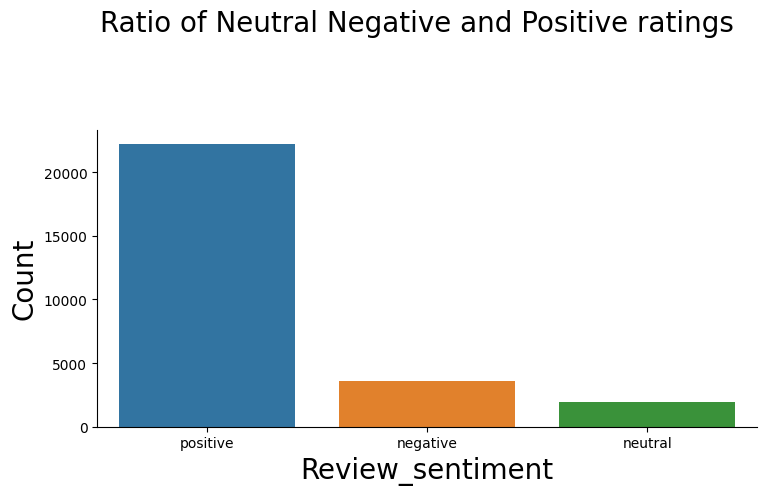

In [70]:
fig, axes = plt.subplots(1, figsize=(8,5))
fig.suptitle("Ratio of Neutral Negative and Positive ratings", fontsize = 20)
plt.tight_layout(pad = 3.5)
sns.countplot(x = "classes", data = df_merged)
axes.set_xlabel("Review_sentiment", fontsize = 20)
axes.set_ylabel("Count", fontsize = 20)
sns.despine()

In [71]:
# display number of positive and negative reviews

neg  = pos_neg[1]
pos  = pos_neg[0]

print("No. of negative review: ", neg)
print("\nNo. of positive review: ", pos)
print("\nnegative review rate is about {0}%".format(
    round((neg/float(pos+neg))*100), 2))
print("\npositve review rate is about {0}%".format(
    round((pos/float(pos+neg))*100), 2))

No. of negative review:  6815

No. of positive review:  20938

negative review rate is about 25%

positve review rate is about 75%


Let's check how review sentiment change the overall rating

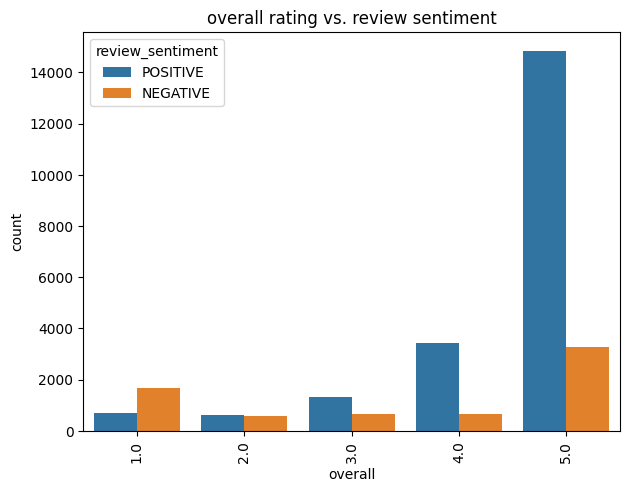

In [72]:
plt.figure()
sns.countplot(data=df_merged,x=df_merged["overall"],hue=df_merged["review_sentiment"])
plt.xticks(rotation=90)
plt.tight_layout()
plt.title("overall rating vs. review sentiment")
plt.show()

Observation : From above plot we can say that positive reviews have high overall rating as expected , no any different pattern found. for rating 1 the negative reviews are more.

Top 10 Brands by review count

In [73]:
# top 10 brand having more count of reviews
df_merged['brand'].value_counts()[:10]

Samsung       8074
BLU           7674
LG            2059
Motorola      1945
Apple         1791
Nokia         1333
BlackBerry    1264
Huawei         768
Sony           739
Asus           541
Name: brand, dtype: int64

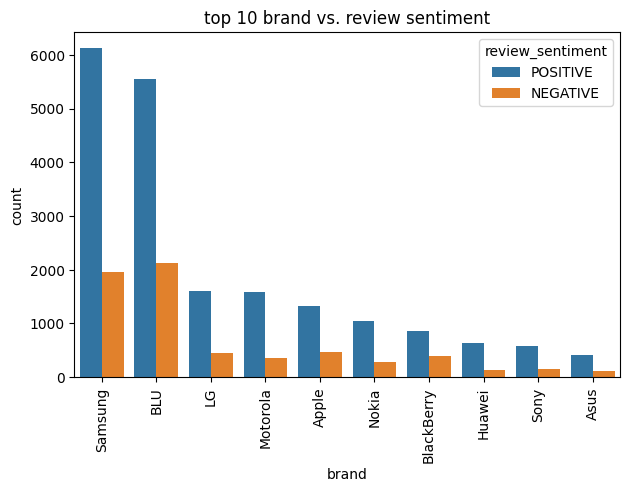

In [74]:
plt.figure()
sns.countplot(data=df_merged,x=df_merged["brand"],hue=df_merged["review_sentiment"],order=df_merged["brand"].value_counts().iloc[:10].index)
plt.xticks(rotation=90)
plt.tight_layout()
plt.title("top 10 brand vs. review sentiment")
plt.show()

# Top 10 brands Vs their ranks in cellphone category

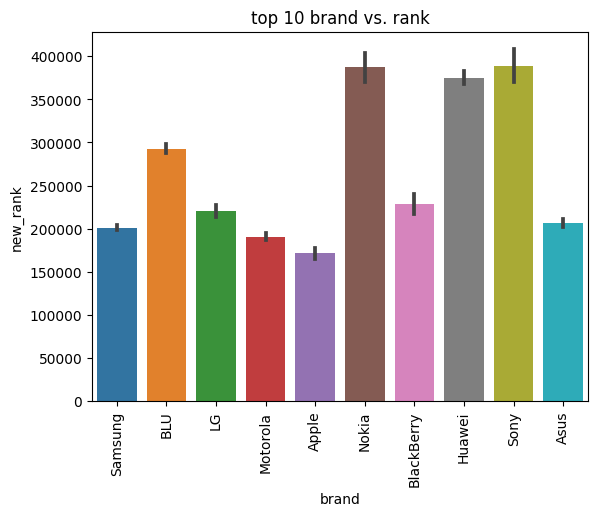

In [75]:
plt.figure()
sns.barplot (data=df_merged,x=df_merged["brand"],y=df_merged["new_rank"],order=df_merged["brand"].value_counts().iloc[:10].index)
plt.xticks(rotation=90)
#plt.tight_layout()
plt.title("top 10 brand vs. rank")
plt.show()

# **Sony leading with rank category**

## **Number of reviews per year**

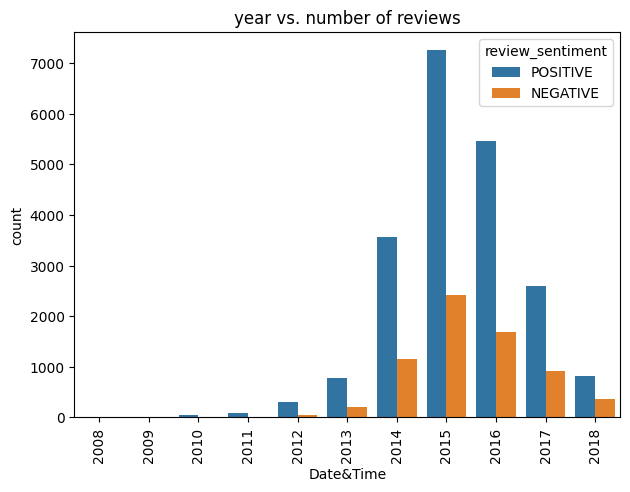

In [76]:
plt.figure()
sns.countplot(data=df_merged,x=pd.DatetimeIndex(df_merged['Date&Time']).year,hue=df_merged["review_sentiment"])

plt.xticks(rotation=90)
plt.tight_layout()
plt.title("year vs. number of reviews")
plt.show()

# **Between 2014-2016, highest reviews received and seen downward trend after that.**

Reviews price distribution wise

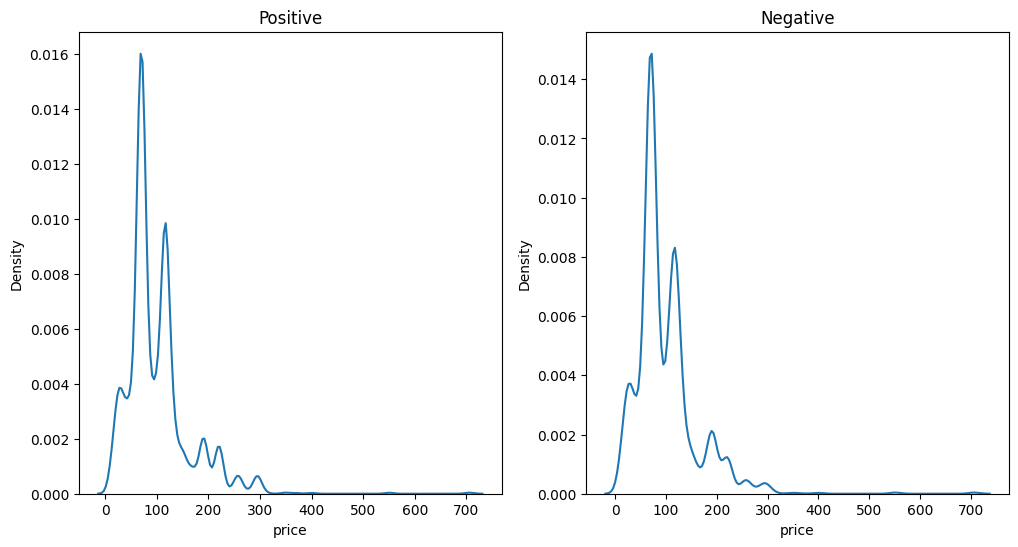

In [77]:
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1, 2, 1, title="Positive")
ax2 = fig.add_subplot(1, 2, 2, title="Negative")

sns.kdeplot(df_merged[df_merged["review_sentiment"] == "POSITIVE"]["price"], ax=ax1)
sns.kdeplot(df_merged[df_merged["review_sentiment"] == "NEGATIVE"]["price"], ax=ax2)

plt.show()

# **Most reviews comes 0 to 300 dollars**

Top 10 Brands Prices

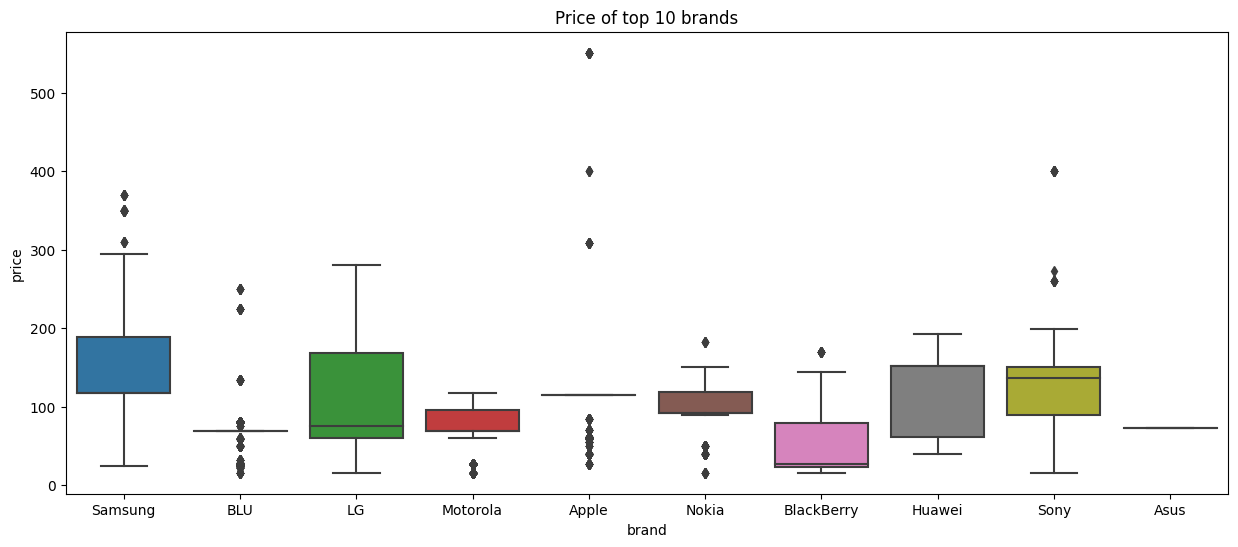

In [78]:

plt.figure(figsize=[15,6])
plt.title("Price of top 10 brands")
sns.boxplot(data=df_merged,x="brand",y="price",order=df_merged["brand"].value_counts().iloc[:10].index)
plt.show()


### **TEXT ANALYTICS**

## **Distribution of sentiment analysis across the dataset**

In [79]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

import nltk
import re
import string
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [80]:
# Reading stop words from a text file in to a list
stop_words = [line.rstrip('\n') for line in open('/content/drive/My Drive/sentiment_analysis/stop_words_long.txt')]

In [81]:
df = df_merged

In [82]:
def clean_dataframe(df):
  # creates new column with corresponding class labels, the output variable.
  df['y'] = df['overall'].apply(classify)

  # dropping uneccesary columns for the analysis
  df = df.drop(labels=[ 'verified','asin','description','title',],axis=1)

  # dropping all NaN values from the column reviewText
  df = df.dropna(axis=0, subset=['reviewText'])
  return df

In [83]:
# splits review rating into different classes, say positive(2), neutral(1) and negative(0).
def classify(x):
    if x == 5.0 or x==4.0:
        return 2
    if x==3.0:
        return 1
    return 0

In [84]:
df=clean_dataframe(df)

In [85]:
# removes all the punctuations for the strings of reviewText, ie '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
def remove_punctuation(text):
    no_punct=[words for words in text if words not in string.punctuation]
    words_wo_punct=''.join(no_punct)
    return words_wo_punct

In [86]:
def text_process(df):
  # Removing all the punctuations from the words, and changing the words to lower case to maintain uniformity
  df['reviewText']=df['reviewText'].apply(lambda x: remove_punctuation(x.lower()))
  # stemming
  stemmer = PorterStemmer()
  # stop words are the words like "the, I, our etc"
  words = stopwords.words("english")
  df['cleaned_reviews'] = df['reviewText'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())
  return df

In [87]:
df['reviewText']=df['reviewText'].astype('str')

In [88]:
df=text_process(df)

In [89]:
# Dropping null values to have a cleaner dataset

df = df.dropna(subset=['cleaned_reviews'])

In [90]:
pip install xlsxwriter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.8/154.8 kB 3.2 MB/s eta 0:00:00


In [91]:
import xlsxwriter

In [92]:
df.to_excel("/content/drive/MyDrive/final_tab.xlsx", engine='xlsxwriter') #xslx file for final tableau analysis

In [93]:
import torch #the pytorch library, used for modeling and formatting our data to be compatible in a pytorch environment
import pandas as pd #for dataframe reading, cleaning functions
from tqdm.notebook import tqdm #used as a progress bar

# Using textblob to generate sentiment for easy visualization
from textblob import TextBlob

# Importing necessary libraries for basic visualization as well as word clouds
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer

Distribution of sentiment analysis across the dataset

In [94]:
# Percentage of neutral, negative, positive words in train and test data
def pert_count(data, category):
    return (len(data[data["classes"] == category])/len(data)) * 100
print(f"Percentage of neutral words in train --> {pert_count(df, 'neutral')} %")
print(f"Percentage of negative words in train --> {pert_count(df, 'negative')} %")
print(f"Percentage of positive words in train --> {pert_count(df, 'positive')} %")

Percentage of neutral words in train --> 7.058696357150579 %
Percentage of negative words in train --> 12.870680647137247 %
Percentage of positive words in train --> 80.07062299571217 %


## ***Words*** and word clouds

In [95]:
# Most repeated words in reviews
stopwords = set(STOPWORDS)
def word_cloud(data, title):
    wordcloud = WordCloud(
    background_color = "white",
    max_font_size = 40,
    max_words = 200,
    stopwords = stopwords,
    scale = 3).generate(str(data))
    fig = plt.figure(figsize = (8.5, 8.5))
    plt.axis("on")
    if title:
        fig.suptitle(title, fontsize=15)
        fig.subplots_adjust(top=2.35)
    plt.imshow(wordcloud)
    plt.show()

In [96]:
# seperating all records into a different variable to generate wordcloud based on category
neu=df[df["classes"] == "neutral"]["cleaned_reviews"]
nega=df[df["classes"] == "negative"]["cleaned_reviews"]
posi=df[df["classes"] == "positive"]["cleaned_reviews"]

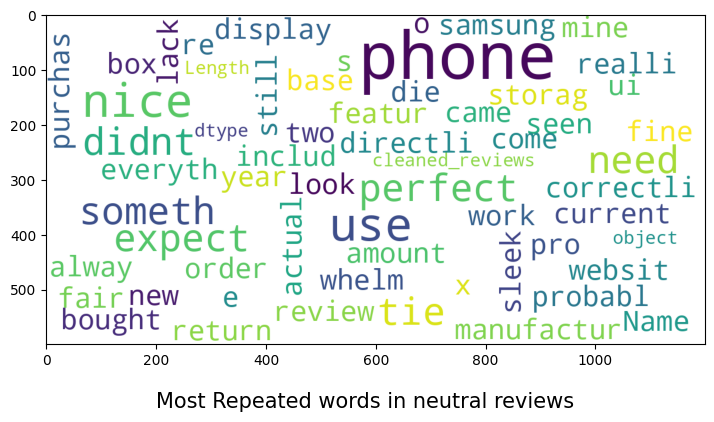

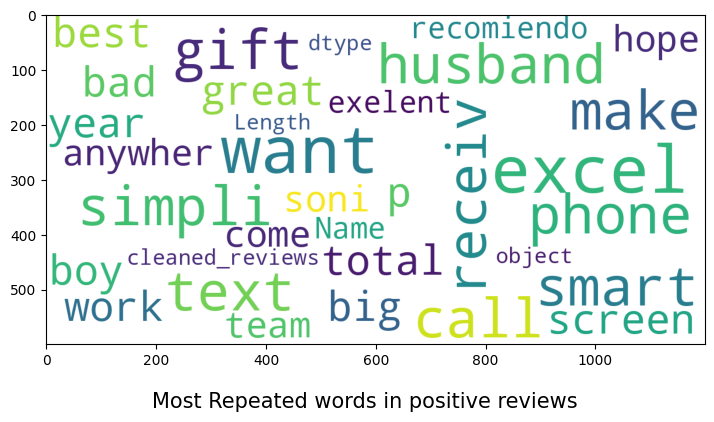

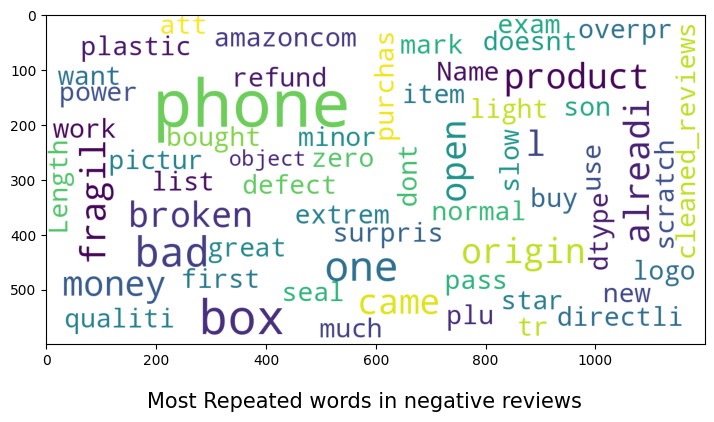

In [97]:
# Generating wordcloud based on category
word_cloud(neu, "Most Repeated words in neutral reviews")
word_cloud(posi, "Most Repeated words in positive reviews")
word_cloud(nega, "Most Repeated words in negative reviews")

In [98]:
# calculating sentiment polarity using external libraries
df['sentiment'] = df['cleaned_reviews'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
df.head(3)

,overall,reviewerID,style,reviewerName,reviewText,summary,review_sentiment,Date&Time,also_buy,brand,...,details,price,category_new,new_rank,also_view_new,also_view_brand,classes,y,cleaned_reviews,sentiment
0,5.0,A1LFAMJJM87RSG,{'Color:': ' Silver'},Gayle Ledyard,this was a gift for my husband who does not wa...,Great phone,POSITIVE,2013-02-06,[],Motorola,...,{},69.264778,Cell Phones,544961.0,"[B0009FCAJA, B005LRBF88, B002UHS0UI, B000A1329...","[Motorola, GreatCall, BlackBerry]",positive,2,gift husband want text simpli receiv make call...,0.225000
1,4.0,AEYUHCDXPEGC2,{'Color:': ' Silver'},mark4348,works great,Four Stars,POSITIVE,2015-08-08,[],Motorola,...,{},69.264778,Cell Phones,544961.0,"[B0009FCAJA, B005LRBF88, B002UHS0UI, B000A1329...","[Motorola, GreatCall, BlackBerry]",positive,2,work great,0.800000
2,1.0,A14AQLOUQ6JUDZ,{'Color:': ' Silver'},noemi,not the original one very bad product to fragi...,Very bad product. To fragile,NEGATIVE,2015-01-28,[],Motorola,...,{},69.264778,Cell Phones,544961.0,"[B0009FCAJA, B005LRBF88, B002UHS0UI, B000A1329...","[Motorola, GreatCall, BlackBerry]",negative,0,origin one bad product fragil broken alreadi l...,-0.393333


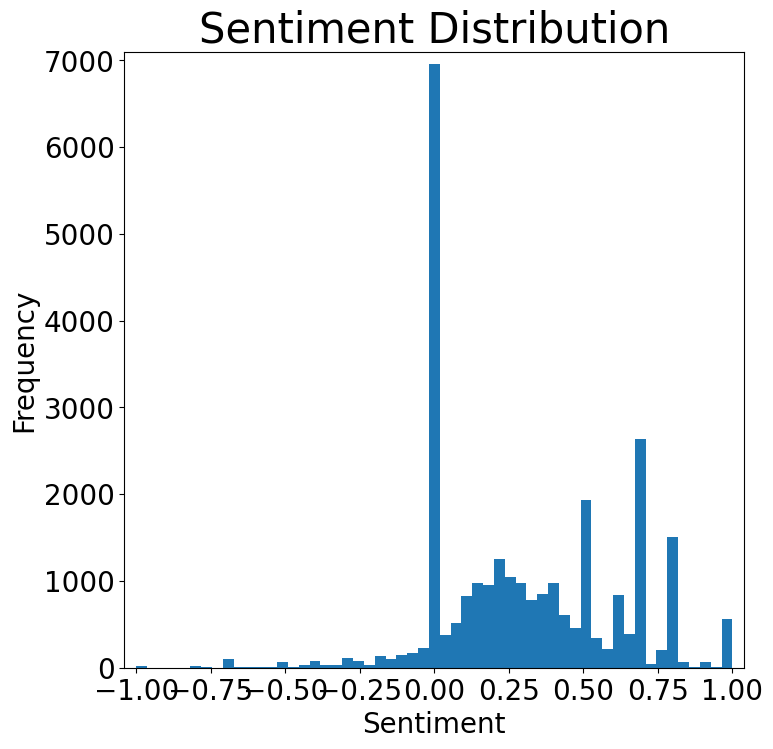

In [99]:
#Barchart using to visualize the sentiment distribution generated above
plt.figure(figsize=(8,8))
plt.margins(0.02)
plt.xlabel('Sentiment', fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.yticks(fontsize=20)
plt.hist(df['sentiment'], bins=55)
plt.title('Sentiment Distribution', fontsize=30)
plt.show()

People tend to put in reviews only when its positive or when its neutral.
When the product is bad or not worth, they merely gave any feedback.



Correlation heatmap to analyse the dependence between review length and sentiment

<Axes: >

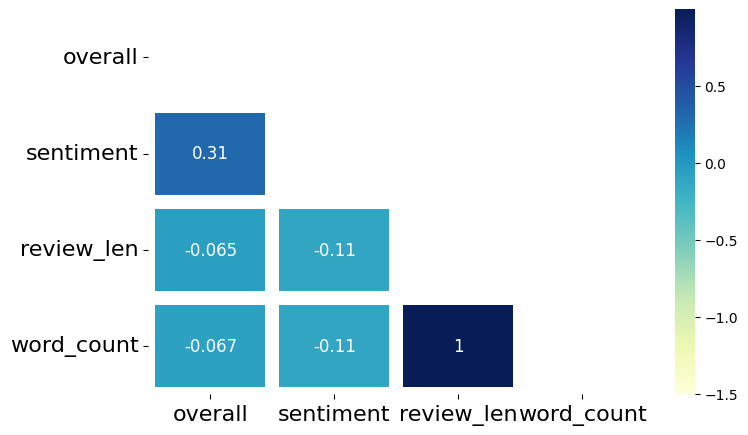

In [100]:
# Heatmap from overall rating, review length, sentiment and word count

# calculating word count and review length
df['word_count'] = df["reviewText"].apply(lambda x: len(str(x).split(" ")))
df['review_len'] =df["reviewText"].apply(lambda x: len(str(x)))

# visualising the heatmap
correlation = df[['overall','sentiment', 'review_len', 'word_count']].corr()
mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(8,5))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
sns.heatmap(correlation, cmap='YlGnBu', annot=True, annot_kws={"size": 12}, linewidths=10, vmin=-1.5, mask=mask)


Correlation heatmap indicates that there's a negative correlation between review length and the sendiment indicating negative reviews tend to be longer than positive or neutral ones. It is obvious that people write a more to give a negative feedback, and vice versa.